## Boostrapping, Intervalos de confianza

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('agro_data.csv', sep=';', encoding = "ISO-8859-1")

In [3]:
print(data.columns)

Index(['DEPARTAMENTO', 'GRUPO_CULTIVO', 'CULTIVO', 'ANIO', 'AREA_SEMBRADA',
       'AREA_COSECHADA', 'PRODUCCION', 'RENDIMIENTO', 'CICLO_DE_CULTIVO'],
      dtype='object')


In [5]:
rendimiento = data['RENDIMIENTO']
rendimiento

0         0.50
1         0.82
2         1.00
3         1.00
4         1.00
          ... 
201931    3.13
201932    4.26
201933    3.10
201934    4.26
201935    2.97
Name: RENDIMIENTO, Length: 201936, dtype: float64

## ¿Cuál el la Media, SD y SE del rendimiento de cultivos en el pais?

### Toda la muestra

In [7]:
all_mean = round(rendimiento.mean(), 2)
all_std = round(rendimiento.std(), 2)
all_se = round(rendimiento.std()/(len(data) ** 0.5), 2)
print('[ALL DATA] Mean: {} SD: {} SE: {}'.format(all_mean, all_std, all_se))

[ALL DATA] Mean: 9.19 SD: 14.74 SE: 0.03


#### Gráfica

(array([1.88206e+05, 9.93500e+03, 1.39800e+03, 7.61000e+02, 9.84000e+02,
        3.74000e+02, 1.80000e+02, 7.00000e+01, 2.00000e+01, 8.00000e+00]),
 array([3.00000e-02, 2.46270e+01, 4.92240e+01, 7.38210e+01, 9.84180e+01,
        1.23015e+02, 1.47612e+02, 1.72209e+02, 1.96806e+02, 2.21403e+02,
        2.46000e+02]),
 <a list of 10 Patch objects>)

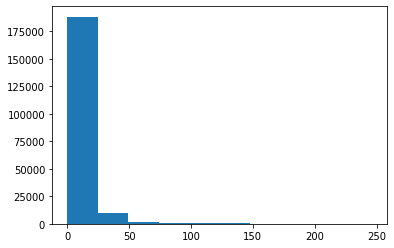

In [8]:
plt.hist(rendimiento)

### Con una sola muestra

In [10]:
sample_size = 1000
sample = np.random.choice(data['RENDIMIENTO'], size=sample_size)
sample_mean = round(sample.mean(), 2)
sample_std = round(sample.std(), 2)
sample_se = round(sample.std()/(sample_size ** 0.5), 2)
print('[One Sample] Mean: {} SD: {} SE: {}'.format(sample_mean, sample_std, sample_se))

[One Sample] Mean: 9.22 SD: 13.22 SE: 0.42


#### Gráfica

(array([839., 121.,  21.,   7.,   3.,   3.,   3.,   2.,   0.,   1.]),
 array([1.20000e-01, 1.51080e+01, 3.00960e+01, 4.50840e+01, 6.00720e+01,
        7.50600e+01, 9.00480e+01, 1.05036e+02, 1.20024e+02, 1.35012e+02,
        1.50000e+02]),
 <a list of 10 Patch objects>)

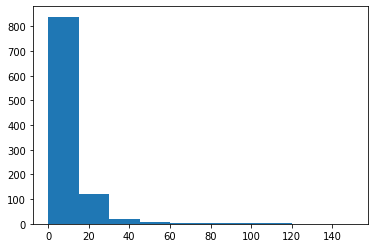

In [11]:
plt.hist(sample)

### Boostrap

In [12]:
sample_means = []
iterations = 10000
simulated_sample_size = 1000
for _ in range(iterations):
    sample = np.random.choice(rendimiento, size=simulated_sample_size)
    sample_means.append(sample.mean())

In [13]:
simulated_mean = round(np.mean(sample_means),2)
simulated_std = round(np.std(sample_means),2)
simulated_se = round(simulated_std/(simulated_sample_size ** 0.5),2)
print('[BOOSTRAPPING] Mean: {} SD: {} SE: {}'.format(simulated_mean, simulated_std, simulated_se))

[BOOSTRAPPING] Mean: 9.19 SD: 0.47 SE: 0.01


#### Gráfica

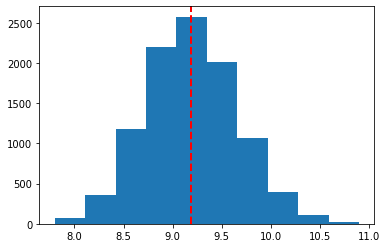

In [14]:
plt.hist(sample_means)
plt.axvline(simulated_mean, color='red', linestyle='dashed', linewidth=2)

### Intervalo de confianza

#### Por error estandar.

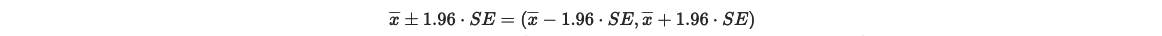

In [15]:
print('El intervalo de confianza para el rendimiento es:\n ({} - 1.96 · {}, {} + 1.96 · {})'.format(simulated_mean, simulated_se, simulated_mean, simulated_se))
low = round(simulated_mean-(1.96*simulated_se), 2)
hig = round(simulated_mean+(1.96*simulated_se), 2)
print('({},{})'.format(low,hig))

El intervalo de confianza para el rendimiento es:
 (9.19 - 1.96 · 0.01, 9.19 + 1.96 · 0.01)
(9.17,9.21)


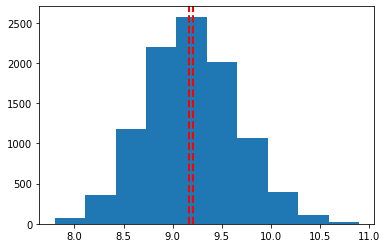

In [16]:
plt.hist(sample_means)
plt.axvline(low, color='red', linestyle='dashed', linewidth=2)
plt.axvline(hig, color='red', linestyle='dashed', linewidth=2)

## Por Percentil

In [17]:
intervalo_percentil = np.percentile(sample_means, [2.5,97.5])
print(intervalo_percentil)

[ 8.3182735 10.1556945]


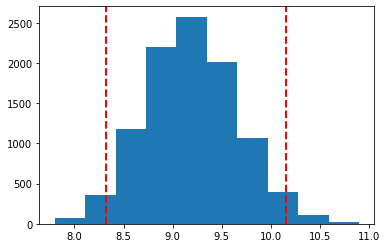

In [18]:
plt.hist(sample_means)
plt.axvline(intervalo_percentil[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(intervalo_percentil[1], color='red', linestyle='dashed', linewidth=2)

## Notas

- Cuando hacemos muchas iteraciones y el tamaño de muestra es grande, es error baja y el intervalo se acota.
- Cuando la población es grande y usamos el método de percentil, el intervalo es grande pero error tambien.